#  Data Wrangling

In [2]:
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings

# Gather

In [3]:
# read csv file
twitter_archive = pd.read_csv('twitter_archive_enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
#Use requests library to download tsv file
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
#Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [7]:
CONSUMER_KEY = "YyXfbAXTF8mz6BjPkiA7C1vGi"
CONSUMER_SECRET = "HGaqEi4igluJzHKghf32mKPVyKFa5aK3nwSZ1AVu2gpWZEmDc0"
OAUTH_TOKEN = "560981674-8wePwgw0qKeGDxLxvKbcI40OpfNup5FWsBknABcl"
OAUTH_TOKEN_SECRET = "wPvQ2GyW7MNvMMU9NK9G88bjPaQQVd4GyliW4r9MIhgS6" 

In [8]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)

In [9]:
# Use Twitter API to collect status data on tweets present in twitter_archive dataframe

tweet_ids = list(twitter_archive['tweet_id'])

tweet_data = []
tweet_id_success = []
tweet_id_missing = []

# Calculate the time of excution
start = time.time()

for tweet_id in tweet_ids:
    try:
        page = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        favorites = page['favorite_count']
        retweets = page['retweet_count']
        time = pd.to_datetime(page['created_at'])
        tweet_data.append({'tweet_id': int(id),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        tweet_id_success.append(tweet_id)
        
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweet_id_missing.append(tweet_id)
        
# Calculate the time of excution
end = time.time()
print(end - start)

892420643555336193 _ [{'code': 326, 'message': 'To protect our users from spam and other malicious activity, this account is temporarily locked. Please log in to https://twitter.com to unlock your account.'}]
892177421306343426 _ [{'code': 326, 'message': 'To protect our users from spam and other malicious activity, this account is temporarily locked. Please log in to https://twitter.com to unlock your account.'}]
891815181378084864 _ [{'code': 326, 'message': 'To protect our users from spam and other malicious activity, this account is temporarily locked. Please log in to https://twitter.com to unlock your account.'}]
891689557279858688 _ [{'code': 326, 'message': 'To protect our users from spam and other malicious activity, this account is temporarily locked. Please log in to https://twitter.com to unlock your account.'}]
891327558926688256 _ [{'code': 326, 'message': 'To protect our users from spam and other malicious activity, this account is temporarily locked. Please log in to ht

In [10]:
# Create a dataframe with tweet ID, retweet count, and favorite count
tweet_data = []
with open('tweet_json.txt') as file:
    for line in file:
        tweet = json.loads(line)
        
        tweet_data.append({
            'tweet_id': tweet['id'],
            'retweet_count': tweet['retweet_count'],
            'favorite_count': tweet['favorite_count']
        })
df_tweet = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
       
df_tweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


## Assessing

In [12]:
# Print some random examples
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1466,694342028726001664,NaN,NaN,2016-02-02 02:10:14 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",It's okay pup. This happens every time I liste...,NaN,NaN,NaN,https://vine.co/v/iJWKejYdLlh,11,10,None,None,None,None,None
648,793120401413079041,NaN,NaN,2016-10-31 16:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793120401...,11,10,Robin,None,None,None,None
1468,694206574471057408,NaN,NaN,2016-02-01 17:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Martha come take a look at this. I'm so fed u...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694206574...,10,10,None,None,None,None,None
767,777641927919427584,NaN,NaN,2016-09-18 22:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Arnie. He's a Nova Scot...,7.504293e+17,4.196984e+09,2016-07-05 20:41:01 +0000,https://twitter.com/dog_rates/status/750429297...,12,10,Arnie,None,None,None,None
1397,699779630832685056,NaN,NaN,2016-02-17 02:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Take all my money. 10/10 https://t.co/B28ebc5LzQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699779630...,10,10,None,None,None,None,None
143,864197398364647424,NaN,NaN,2017-05-15 19:14:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paisley. She ate a flower just to prov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/864197398...,13,10,Paisley,None,None,None,None
1282,708738143638450176,NaN,NaN,2016-03-12 19:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coco. She gets to stay on the Bachelor...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708738143...,11,10,Coco,None,None,None,None
2047,671518598289059840,NaN,NaN,2015-12-01 02:38:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scruffers. He's being violated on mult...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671518598...,9,10,Scruffers,None,None,None,None
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Fun dogs here. Top one clearly an athlete. Bot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635...,9,10,None,None,None,None,None
2078,670832455012716544,NaN,NaN,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670832455...,10,10,Amy,None,None,None,None


In [13]:
# Assessing the data programmaticaly
twitter_archive.info()
twitter_archive.describe()
twitter_archive['rating_numerator'].value_counts()
twitter_archive['rating_denominator'].value_counts()
twitter_archive['name'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Willy        1
space        1
Tripp        1
Swagger      1
Edd          1
Name: name, Length: 957, dtype: int64

In [14]:
# View descriptive statistics of twitter_archive
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
twitter_archive.loc[twitter_archive['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [16]:
df_tweet.sample(5)

,tweet_id,retweet_count,favorite_count
1987,672828477930868736,533,1343
526,808733504066486276,2509,8784
1715,680191257256136705,577,2356
1215,714962719905021952,4816,8028
591,798933969379225600,5203,14712


In [17]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [18]:
image_predictions.info()
image_predictions['jpg_url'].value_counts()
image_predictions[image_predictions['jpg_url'] == 'https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.22577,True,German_short-haired_pointer,0.175219,True


In [19]:
# View number of entries for each source
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
#For rating that don't follow pattern
twitter_archive[twitter_archive['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [21]:
#unusual names
twitter_archive[twitter_archive['name'].apply(len) < 5]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [22]:
#Orignal Tweets 
twitter_archive[twitter_archive['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


## Quality
*Completeness, Validity, Accuracy, Consistency => a.k.a content issues*

**twitter_archive dataset**
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be integers/strings instead of float.
- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- The numerator and denominator columns have invalid values.
- In several columns null objects are non-null (None to NaN).
- Name column have invalid names i.e 'None', 'a', 'an' and less than 3 characters.
- We only want original ratings (no retweets) that have images.
- We may want to change this columns type (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and tweet_id) to string because We don't want any operations on them.
- Sources difficult to read.

**image_predictions dataset**
- Missing values from images dataset (2075 rows instead of 2356)
- Some tweet_ids have the same jpg_url
- Some tweets are have 2 different tweet_id one redirect to the other (Dataset contains retweets)

**tweet_data dataset**

- This tweet_id (666020888022790149) duplicated 8 times


## Tidiness
Untidy data => a.k.a structural issues
- No need to all the informations in images dataset, (tweet_id and jpg_url what matters)
- Dog "stage" variable in four columns: doggo, floofer, pupper, puppo
- Join 'tweet_info' and 'image_predictions' to 'twitter_archive'

## Cleaning
Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.

In [28]:
from functools import reduce

In [29]:
# Make copies of the dataframes for cleaning

twitter_archive_clean = twitter_archive.copy()
df_tweet_clean = df_tweet.copy()
image_predictions_clean = image_predictions.copy()

#### Define
Cleaning our data is the third step in data wrangling. It is where we will fix the quality and tidiness issues that we identified in the assess step.
Remove 181 columns which are retweets and detected by the columns: retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp. Remove retweets by keeping the null rows of retweeted_status_id column.

#### Code

In [30]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### Missing data in expanded_urls

#### Define
Remove the tweets without expanded_urls i.e images by keeping the non null data in the expanded_urls column.

#### Code

In [32]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [33]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

#### Merge three data frames

#### Define
Merge the tweet_clean and image_predictions tables to the twitter_archive_clean table, both joining on tweet_id.

#### Code

In [35]:
# First, merge df_tweet_clean table to the df_twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, df_tweet_clean, 
                                    on = ['tweet_id'], how = 'left')

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

In [37]:
# Second, merge df_image_predictions table to the df_twitter_archive_clean
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions, 
                                    on = ['tweet_id'], how = 'left')

#### Test

In [38]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

#### After merging the data frames, keep the tweets with images.

In [39]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.jpg_url.notnull()]

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

#### Drop the tweets with no retweet_count

In [41]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweet_count.notnull()]

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

#### Drop unneeded columns


#### Define
Drop the the columns related to the retweets and the replies: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id.

#### Code

In [43]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                              'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

#### Test

In [45]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2116
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1994 non-null   int64  
 1   timestamp           1994 non-null   object 
 2   source              1994 non-null   object 
 3   text                1994 non-null   object 
 4   expanded_urls       1994 non-null   object 
 5   rating_numerator    1994 non-null   int64  
 6   rating_denominator  1994 non-null   int64  
 7   name                1994 non-null   object 
 8   doggo               1994 non-null   object 
 9   floofer             1994 non-null   object 
 10  pupper              1994 non-null   object 
 11  puppo               1994 non-null   object 
 12  retweet_count       1994 non-null   int64  
 13  favorite_count      1994 non-null   int64  
 14  jpg_url             1994 non-null   object 
 15  img_num             1994 non-null   float64
 16  p1    

#### Combine dog "stage" columns (i.e. doggo, floofer, pupper, and puppo) into one column.


#### Define
Create a new column named dog_stage. Extract doggo, floofer, pupper and puppo from the text column using pandas' str.extact method and place them into the dog_stage column. Fill the null values with None.

In [47]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains('floofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
42,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
453,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
595,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,...,1.0,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True


In [49]:
twitter_archive_clean[twitter_archive_clean['text'].str.contains('floof')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
24,887101392804085760,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,...,1.0,Samoyed,0.733942,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True
42,883360690899218434,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,...,1.0,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
49,881906580714921986,2017-07-03 16:04:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rey. He's a Benebop Cumberfloof. 12/10...,https://twitter.com/dog_rates/status/881906580...,12,10,Rey,None,None,...,1.0,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
341,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,...,2.0,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
453,800388270626521089,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doc. He takes time out of every day to...,https://twitter.com/dog_rates/status/800388270...,12,10,Doc,None,floofer,...,2.0,golden_retriever,0.359860,True,Pembroke,0.194207,True,collie,0.154603,True
473,796080075804475393,2016-11-08 20:00:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Yogi. He's 98% floof. Snuggable af. 12...,https://twitter.com/dog_rates/status/796080075...,12,10,Yogi,None,None,...,1.0,chow,0.973846,True,Tibetan_mastiff,0.014110,True,gibbon,0.002358,False
479,794332329137291264,2016-11-04 00:15:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Nimbus (like the cloud). He just bough...,https://twitter.com/dog_rates/status/794332329...,12,10,Nimbus,None,None,...,1.0,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
571,780543529827336192,2016-09-26 23:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a perturbed super floof. 12/10 would sn...,https://twitter.com/dog_rates/status/780543529...,12,10,None,None,None,...,1.0,golden_retriever,0.628312,True,Labrador_retriever,0.317365,True,Tibetan_mastiff,0.012260,True
595,776218204058357768,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,...,1.0,Samoyed,0.940326,True,Pomeranian,0.055527,True,keeshond,0.002226,True
609,773922284943896577,2016-09-08 16:33:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Heinrich (pronounced ""Pat""). He's a Bo...",https://twitter.com/dog_rates/status/773922284...,12,10,Heinrich,None,None,...,1.0,Pomeranian,0.554331,True,Samoyed,0.432158,True,chow,0.003199,True


#### Define
 Melt the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column 'dog_stage'.

#### Code

In [50]:
# Select the columns to melt and to remain
MELTS_COLUMNS = ['doggo', 'floofer', 'pupper', 'puppo']
STAY_COLUMNS = [x for x in twitter_archive_clean.columns.tolist() if x not in MELTS_COLUMNS]


# Melt the the columns into values
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars = STAY_COLUMNS, value_vars = MELTS_COLUMNS, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_clean = twitter_archive_clean.drop('stages', 1)

#### Test

In [51]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None       7659
pupper      212
doggo        74
puppo        23
floofer       8
Name: dog_stage, dtype: int64
7976


#### Clean
Clean rows and columns that we will not need

#### Code

In [54]:
#Delete dog_stage duplicates
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test

In [55]:
print(twitter_archive_clean.dog_stage.value_counts())
print(len(twitter_archive_clean))

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dog_stage, dtype: int64
1994


#### Define
Get rid of image prediction columns

#### Code

In [56]:
# We will store the fisrt true algorithm with it's level of confidence
prediction_algorithm = []
confidence_level = []

# Get_prediction_confidence function:
# search the first true algorithm and append it to a list with it's level of confidence
# if flase prediction_algorthm will have a value of NaN
def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction_algorithm.append(dataframe['p1'])
        confidence_level.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction_algorithm.append(dataframe['p2'])
        confidence_level.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction_algorithm.append(dataframe['p3'])
        confidence_level.append(dataframe['p3_conf'])
    else:
        prediction_algorithm.append('NaN')
        confidence_level.append(0)

twitter_archive_clean.apply(get_prediction_confidence, axis=1)
twitter_archive_clean['prediction_algorithm'] = prediction_algorithm
twitter_archive_clean['confidence_level'] = confidence_level

#### Test

In [57]:
list(twitter_archive_clean)


['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [58]:
# Delete the columns of image prediction information
twitter_archive_clean = twitter_archive_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [59]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'retweet_count',
 'favorite_count',
 'jpg_url',
 'dog_stage',
 'prediction_algorithm',
 'confidence_level']

In [65]:
# Clean the content of source column
twitter_archive_clean['source'] = twitter_archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

IndexError: list index out of range

In [66]:
# Test
twitter_archive_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,prediction_algorithm,confidence_level
1918,667405339315146752,2015-11-19 18:13:27 +0000,Twitter for iPhone,This is Biden. Biden just tripped... 7/10 http...,https://twitter.com/dog_rates/status/667405339...,7,10,Biden,234,489,https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg,None,Saint_Bernard,0.381377
1917,667435689202614272,2015-11-19 20:14:03 +0000,Twitter for iPhone,Ermergerd 12/10 https://t.co/PQni2sjPsm,https://twitter.com/dog_rates/status/667435689...,12,10,None,89,326,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,None,Rottweiler,0.999091
1916,667437278097252352,2015-11-19 20:20:22 +0000,Twitter for iPhone,Never seen this breed before. Very pointy pup....,https://twitter.com/dog_rates/status/667437278...,10,10,None,257,483,https://pbs.twimg.com/media/CUM2qWaWoAUZ06L.jpg,None,NaN,0.000000
1915,667443425659232256,2015-11-19 20:44:47 +0000,Twitter for iPhone,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,10,None,620,833,https://pbs.twimg.com/media/CUM8QZwW4AAVsBl.jpg,None,NaN,0.000000
1914,667453023279554560,2015-11-19 21:22:56 +0000,Twitter Web Client,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,10,Cupcake,96,327,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,None,Labrador_retriever,0.825670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,790946055508652032,2016-10-25 16:00:09 +0000,Twitter for iPhone,This is Betty. She's assisting with the dishes...,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,5496,18601,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,puppo,golden_retriever,0.245773
6087,867421006826221569,2017-05-24 16:44:18 +0000,Twitter for iPhone,This is Shikha. She just watched you drop a sk...,https://twitter.com/dog_rates/status/867421006...,12,10,Shikha,2697,16755,https://pbs.twimg.com/media/DAmyy8FXYAIH8Ty.jpg,puppo,Eskimo_dog,0.616457
6044,878776093423087618,2017-06-25 00:45:22 +0000,Twitter for iPhone,This is Snoopy. He's a proud #PrideMonthPuppo....,https://twitter.com/dog_rates/status/878776093...,13,10,Snoopy,4319,19763,https://pbs.twimg.com/media/DDIKMXzW0AEibje.jpg,puppo,Italian_greyhound,0.734684
6279,825535076884762624,2017-01-29 02:44:34 +0000,Twitter for iPhone,Here's a very loving and accepting puppo. Appe...,https://twitter.com/dog_rates/status/825535076...,14,10,None,19669,56413,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg,puppo,Rottweiler,0.681495


#### Define
Fix rating numerator and denominators that are not actually ratings

#### Code

In [67]:
# View all occurences where there are more than one #/# in 'text' column
text_ratings_to_fix = twitter_archive_clean[twitter_archive_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

C:\Users\Zahidah\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


1911    Two dogs in this one. Both are rare Jujitsu Py...
1902    This is Kial. Kial is either wearing a cape, w...
1944    These are Peruvian Feldspars. Their names are ...
1973    This is an Albanian 3 1/2 legged  Episcopalian...
3212    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
3201    This is Eriq. His friend just reminded him of ...
3151    Meet Oliviér. He takes killer selfies. Has a d...
3146    This may be the greatest video I've ever been ...
3186    When bae says they can't go out but you see th...
3322    This is Darrel. He just robbed a 7/11 and is i...
2919    This is Bluebert. He just saw that both #Final...
2935    Meet Travis and Flurp. Travis is pretty chill ...
3056    This is Socks. That water pup w the super legs...
3702    Meet Holly. She's trying to teach small human-...
3649    10/10 for dog. 7/10 for cat. 12/10 for human. ...
3814    Here we have Pancho and Peaches. Pancho is a C...
3851    This is Spark. He's nervous. Other dog hasn't ...
3751    Meet H

In [68]:
for entry in text_ratings_to_fix:
    mask = twitter_archive_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    twitter_archive_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    twitter_archive_clean.loc[mask, column_name2] = 10

In [69]:
twitter_archive_clean[twitter_archive_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,prediction_algorithm,confidence_level
1911,667491009379606528,2015-11-19 23:53:52 +0000,Twitter Web Client,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,8,10,None,242,559,https://pbs.twimg.com/media/CUNniSlUYAEj1Jl.jpg,None,borzoi,0.852088
1902,667544320556335104,2015-11-20 03:25:43 +0000,Twitter Web Client,"This is Kial. Kial is either wearing a cape, w...",https://twitter.com/dog_rates/status/667544320...,4,10,Kial,568,917,https://pbs.twimg.com/media/CUOYBbbWIAAXQGU.jpg,None,Pomeranian,0.412893
1944,666835007768551424,2015-11-18 04:27:09 +0000,Twitter for iPhone,These are Peruvian Feldspars. Their names are ...,https://twitter.com/dog_rates/status/666835007...,10,10,None,83,222,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,None,Airedale,0.448459
1973,666287406224695296,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9,10,an,71,152,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,None,Maltese_dog,0.857531
3212,689835978131935233,2016-01-20 15:44:48 +0000,Twitter for iPhone,Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,850,2369,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,None,collie,0.600186
3201,690400367696297985,2016-01-22 05:07:29 +0000,Twitter for iPhone,This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,509,2041,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,None,Pembroke,0.426459
3151,694352839993344000,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,700,2244,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,None,Australian_terrier,0.407886
3146,695064344191721472,2016-02-04 02:00:27 +0000,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,685,1771,https://pbs.twimg.com/ext_tw_video_thumb/69506...,None,NaN,0.000000
3186,691483041324204033,2016-01-25 04:49:38 +0000,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,656,2608,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,None,bloodhound,0.886232
3322,682962037429899265,2016-01-01 16:30:13 +0000,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,15043,26239,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,None,Chihuahua,0.155207


#### Define
Fix rating numerator that have decimals.

#### Code


In [70]:

# View tweets with decimals in rating in 'text' column
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\Zahidah\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,prediction_algorithm,confidence_level
39,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
3368,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
2497,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
4541,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


In [71]:
# Set correct numerators for specific tweets
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 883482846933004288) & (twitter_archive_clean['rating_numerator'] == 5), ['rating_numerator']] = 13.5
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 786709082849828864) & (twitter_archive_clean['rating_numerator'] == 75), ['rating_numerator']] = 9.75
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 778027034220126208) & (twitter_archive_clean['rating_numerator'] == 27), ['rating_numerator']] = 11.27
twitter_archive_clean.loc[(twitter_archive_clean['tweet_id'] == 680494726643068929) & (twitter_archive_clean['rating_numerator'] == 26), ['rating_numerator']] = 11.26

#### Test

In [72]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


C:\Users\Zahidah\Anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,dog_stage,prediction_algorithm,confidence_level
39,883482846933004288,2017-07-08 00:28:19 +0000,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.5,10,Bella,10407,46860,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,None,golden_retriever,0.943082
3368,680494726643068929,2015-12-25 21:06:00 +0000,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,542,1879,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,None,kuvasz,0.438627
2497,786709082849828864,2016-10-13 23:23:56 +0000,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,7069,20296,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,None,Pomeranian,0.467321
4541,778027034220126208,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,1885,7320,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,pupper,clumber,0.946718


#### Define
Get Dogs gender column from text column

#### Code

In [73]:
# Loop on all the texts and check if it has one of pronouns of male or female
# and append the result in a list

male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

dog_gender = []

for text in twitter_archive_clean['text']:
    # Male
    if any(map(lambda v:v in male, text.split())):
        dog_gender.append('male')
    # Female
    elif any(map(lambda v:v in female, text.split())):
        dog_gender.append('female')
    # If group or not specified
    else:
        dog_gender.append('NaN')

# Test
len(dog_gender)

# Save the result in a new column 'dog_name'
twitter_archive_clean['dog_gender'] = dog_gender

#### Test

In [74]:
print("dog_gender count \n", twitter_archive_clean.dog_gender.value_counts())

dog_gender count 
 NaN       1132
male       636
female     226
Name: dog_gender, dtype: int64


#### Define
Convert the null values to None type

#### Code

In [75]:
twitter_archive_clean.loc[twitter_archive_clean['prediction_algorithm'] == 'NaN', 'prediction_algorithm'] = None
twitter_archive_clean.loc[twitter_archive_clean['dog_gender'] == 'NaN', 'dog_gender'] = None
twitter_archive_clean.loc[twitter_archive_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0
#twitter_archive_clean.loc[twitter_archive_clean['rating_denominator'] == 'NaN', 'rating_denominator'] = 0

#### Test

In [76]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1918 to 6764
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1994 non-null   int64  
 1   timestamp             1994 non-null   object 
 2   source                1994 non-null   object 
 3   text                  1994 non-null   object 
 4   expanded_urls         1994 non-null   object 
 5   rating_numerator      1994 non-null   object 
 6   rating_denominator    1994 non-null   int64  
 7   name                  1994 non-null   object 
 8   retweet_count         1994 non-null   int64  
 9   favorite_count        1994 non-null   int64  
 10  jpg_url               1994 non-null   object 
 11  dog_stage             1994 non-null   object 
 12  prediction_algorithm  1686 non-null   object 
 13  confidence_level      1994 non-null   float64
 14  dog_gender            862 non-null    object 
dtypes: float64(1), int

####  Test

In [79]:
twitter_archive_clean.dtypes

tweet_id                             object
timestamp               datetime64[ns, UTC]
source                             category
text                                 object
expanded_urls                        object
rating_numerator                     object
rating_denominator                    int64
name                                 object
retweet_count                         int64
favorite_count                        int64
jpg_url                              object
dog_stage                            object
prediction_algorithm                 object
confidence_level                    float64
dog_gender                           object
dtype: object

#### Store

In [82]:
# Save clean DataFrame to csv file
twitter_archive_clean.drop(twitter_archive_clean.columns[twitter_archive_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
twitter_archive_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [83]:
twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tweet_id              1994 non-null   int64  
 1   timestamp             1994 non-null   object 
 2   source                1994 non-null   object 
 3   text                  1994 non-null   object 
 4   expanded_urls         1994 non-null   object 
 5   rating_numerator      1994 non-null   float64
 6   rating_denominator    1994 non-null   int64  
 7   name                  1994 non-null   object 
 8   retweet_count         1994 non-null   int64  
 9   favorite_count        1994 non-null   int64  
 10  jpg_url               1994 non-null   object 
 11  dog_stage             1994 non-null   object 
 12  prediction_algorithm  1686 non-null   object 
 13  confidence_level      1994 non-null   float64
 14  dog_gender            862 non-null    object 
dtypes: float64(2), int64(

### Analyzing

In [85]:
twitter_archive_clean.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
count,1.994000e+03,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,7.358508e+17,12.212528,10.510030,2766.753260,8895.725677,0.464991
std,6.747816e+16,41.463532,7.261522,4674.698447,12213.193181,0.339470
min,6.660209e+17,0.000000,7.000000,16.000000,81.000000,0.000000
25%,6.758475e+17,10.000000,10.000000,624.750000,1982.000000,0.140466
50%,7.084748e+17,11.000000,10.000000,1359.500000,4136.000000,0.459130
75%,7.877873e+17,12.000000,10.000000,3220.000000,11308.000000,0.776387
max,8.924206e+17,1776.000000,170.000000,79515.000000,132810.000000,0.999956


# Visualizations

In [90]:
import seaborn as sns

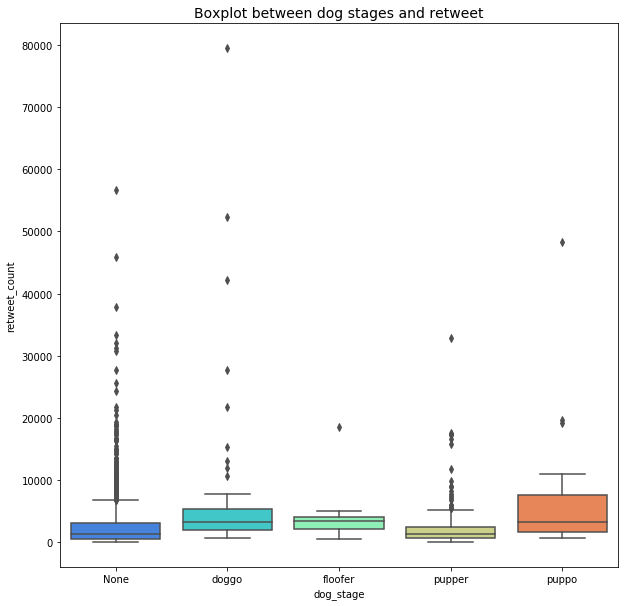

In [95]:
plt.figure(figsize=(10,10))
g = sns.boxplot(x='dog_stage',y='retweet_count',data= twitter_archive_clean,palette='rainbow')
g.axes.set_title('Boxplot between dog stages and retweet', fontsize=14);

Above plot shows that most dogs are in Puppo category, highest retweeted about none stage. But between the four of types dog highest retweeted is doggo.

<Figure size 864x864 with 0 Axes>

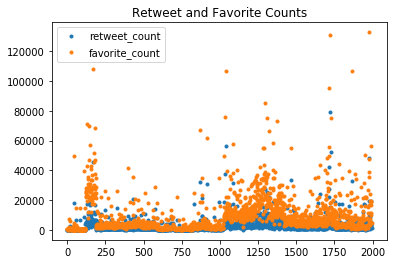

In [106]:
# plotting different realtionship between vaibles
plt.figure(figsize = (12, 12))
twitter_archive_clean[['retweet_count', 'favorite_count']].plot(style = '.')
plt.title('Retweet and Favorite Counts');

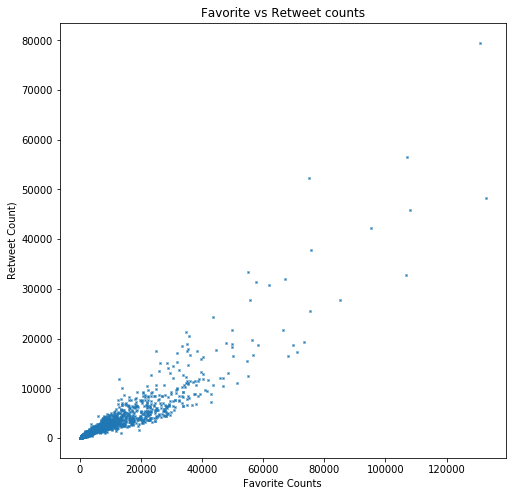

In [108]:
plt.figure(figsize = (8, 8))
plt.plot(twitter_archive_clean.favorite_count, twitter_archive_clean.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts')
plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Count)')
plt.show()

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

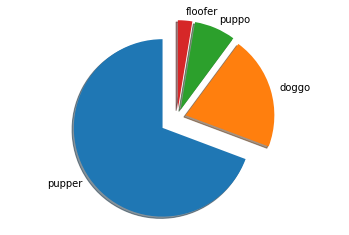

In [118]:
# Plot the data partitioned by dog stage
dog_stage_count = list(twitter_archive_clean[twitter_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = twitter_archive_clean[twitter_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')